In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2.1 Linear Functions

#### Functions in Python

In [2]:
f = lambda x: x[0]+x[1]-(x[3])**2
g = lambda x,a: sum([x[n]*a[n] for n in range(len(x)) if len(x) == len(a)])

In [6]:
x = [-1,0,1,2]
a = [1,2,3,4]
print(f(x))
print(g(x,a))

-5
10


#### Superposition

1. Homogeneity property: f(ax) = a(fx)
2. Additivity property: f(x+y) = f(x) + f(y)
3. Superposition: f(ax+by) = a(fx)+b(fy)

Functions of 1 variable

In [ ]:
f = lambda x: x**2 # this isn't a linear function
x,y=1, 3
alpha, beta = 0.5,0.5
lhs,rhs = f(alpha*x + beta*y), alpha*f(x) + beta*f(y)
lhs,rhs # so we shouldn't be suprised that superposition doesn't hold

(4.0, 5.0)

Functions of more variables

In [ ]:
a = np.array([-2,-1,1,-3])
f = lambda x: np.inner(a,x)
x,y = np.array([2,2,-1,1]), np.array([0,1,-3,0])
alpha, beta = 1.2,-3.7

In [ ]:
lhs,rhs = f(alpha*x + beta*y), alpha*f(x) + beta*f(y)
lhs,rhs

(2.8000000000000025, 2.8000000000000007)

In [ ]:
abs(lhs - rhs) <= 1.0e-6 # we can't use == because of floating point errorrs

True

In [ ]:
e3 = [0,0,1,0]
f(e3)

1

In [ ]:
avg = lambda x: np.inner((np.ones(len(x))/len(x)),x)
x = np.array([1,-3,2,-1])
avg(x)

-0.25

## Non - Linearity Detector ? ## (OPTIONAL EXPLORATION)

In [ ]:
# this is an attempt at a function to check if a function is non linear by trying to find a point where homogeneity fails.
# it doesn't work because we would need to check infinitely many points
def test_linear(f, n):
    if abs(f(0)) > 1.0e-6:
        print('Not linear; function is not zero at x=0')
        return
    test = lambda x: f(x) - x*f(1)
    for i in range(2, n):
        if abs(test(i)) > 1.0e-6:
            print('Not linear; f('+str(i)+')!='+str(i)+'*f(1)')
            return
    print('Cannot determine if function is linear')

In [ ]:
f = lambda x: x * (x - 1) * (x - 2) + x 
test_linear(f, 5) # for some non-linear functions we can find points where homogeneity fails

Not linear; f(3)!=3*f(1)


In [ ]:
from math import sin
from math import pi
g = lambda x: sin(pi * x)
test_linear(g, 100) # for other functions it might not work for any n

Cannot determine if function is linear


# 2.2 Taylor Approximations

In [ ]:
#This is an example of a non linear, non affine function, 
#being approximated by a function that is affine

from math import exp
f = lambda x: x[0] + exp(x[1]-x[0]) #some function f(x, y) = y+e**(y-x)
grad_f = lambda x: [1-exp(x[1]-x[0]), exp(x[1]-x[0])] #function gradient
z = np.array([1,2])
f_hat = lambda x: f(z) + np.inner(grad_f(z),(x-z))
delta = np.array([0.2, 0.1]);
f(z+delta), f_hat(z+delta)

(3.65960311115695, 3.646453645613141)

Graphing Taylor Approximations

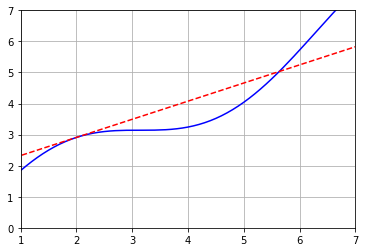

In [14]:
from math import sin
from math import cos
f = lambda x: x + sin(x)
grad_f = lambda x: 1 + cos(x)
z = 2
f_hat = lambda x: f(z) + grad_f(z) * (x - z)
x_vals = [-10.0 + 0.1 * x for x in range(0, 200)]
f_vals = [f(x) for x in x_vals]
f_hat_vals = [f_hat(x) for x in x_vals]
plt.plot(x_vals, f_vals, color='blue')
plt.plot(x_vals, f_hat_vals, linestyle='dashed', color='red')
plt.xlim(1,7)
plt.ylim(0,7)
plt.grid(True)

# 2.3 Regression

In [ ]:
#beta is an n-vector, aka a weight, 
#v is a scalar, aka offset, intercept
#x, y aka regressor, predictor

#beta and v are parameters in this regression model
beta,v = np.array([148.73, -18.85]), 54.40
y_hat = lambda x: np.inner(x,beta) + v
y_hat(np.array([0.846, 1])),y_hat(np.array([1.324,2])) 
#actuals: 115, 234.50

(161.37557999999999, 213.61852000000002)

In [ ]:
%run ./House_Data.ipynb # there is quite a lot of data here 
                        # I've put the data in the file House_Data

price = D["price"]
area = D["area"]
beds = D["beds"]
v = 54.4017 #scalar
beta = [147.7251, -18.8534] #weights *area beta is 148.73 in textbook, might be a small typo here
#scalar and weights were determined using a method learned in Ch13: Least Squares
y_hat = np.array([beta[0]*area + beta[1]*beds])+v
#math notation: y hat = (x^T B) + v = B1*x1 + B2*x2 + v
#this function returns predictions for each house based on beds and area
#it applies a beta to each feature, and an offset, scalar to each price
y_hat

array([[155.7042191, 167.1344646, 132.1236159, 188.2591539, 148.521102 ,
        167.6699522, 184.2151634, 141.3748844, 134.1363545, 103.5572588,
        198.1567356, 162.9981618, 175.3147579, 162.167224 , 234.3493851,
        130.9418151, 158.5664088, 140.1007713, 163.1458869, 182.848738 ,
        182.2024248, 170.1812789, 168.0208152, 201.702138 , 162.7027116,
        170.1812789, 207.3156918, 157.6800582, 196.4394472, 148.2810646,
        147.819376 , 209.3284304, 176.1456957, 153.8392056, 170.7721793,
        213.4278337, 144.440212 , 212.393758 , 267.7906705, 223.6208656,
        216.0314727, 173.3389188, 213.871009 , 213.9633213, 232.1889214,
        172.8957435, 205.5429906, 170.9753172, 168.0208152, 252.4272601,
        177.3274965, 164.770863 , 215.7914353, 216.3269229, 207.611142 ,
        186.929628 , 232.1335086, 199.0430862, 184.8614766, 232.3366465,
        266.701182 , 136.1121936, 221.0541261, 213.871009 , 214.7573596,
        214.7942591, 275.6755136, 217.7118616, 216.

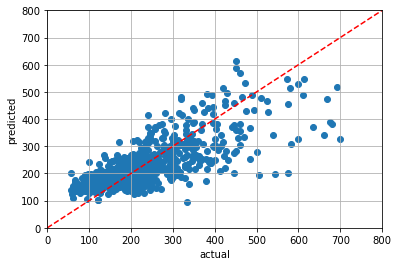

In [ ]:
plt.scatter(price, y_hat)
plt.plot([0,800],[0,800], linestyle='dashed', color = 'red')
plt.xlabel("actual")
plt.xlim(0,800)
plt.ylabel("predicted")
plt.ylim(0,800)
plt.grid(True)